### Central Limit Theorem
1)  CLT states that if you have a population with mean μ, sd σ, and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be normally distributed.

2)  The theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian distribution.

3) If we calculate the mean of a sample, it will be an estimate of the mean of the population distribution. But, like any estimate, it will be wrong and will contain some error. If we draw multiple independent samples, and calculate their means, the distribution of those means will form a Gaussian distribution


In [10]:
import numpy as np
import pandas as pd

In [13]:
# generate random dice rolls
from numpy.random import randint
from numpy import mean
# seed the random number generator
# generate a sample of die rolls
rolls = randint(1, 7, 50)
print(rolls)
print(mean(rolls))

[4 5 5 2 1 2 3 1 1 6 6 2 2 1 5 5 6 2 4 6 3 3 5 1 5 6 3 1 6 4 5 3 2 2 4 5 4
 2 4 3 5 4 4 2 4 4 1 6 2 4]
3.52


In [12]:
import matplotlib.pyplot as plt

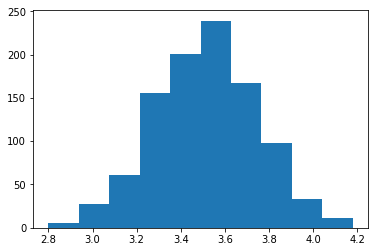

In [6]:
means = [mean(randint(1, 7, 50)) for _ in range(1000)]
# plot the distribution of sample means
plt.hist(means)
plt.show()

### Hypothesis Testing

In [4]:
import pandas as pd
import numpy as np
import math

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Z-test (n>30)

In [6]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

#### Hypothesis
H0 => House prices in OldTown is same from the House Prices of Other Neighborhoods<br>
H1 => House prices in OldTown are different from the House Prices of Other Neighborhoods

In [7]:
from statsmodels.stats.weightstats import ztest

z_stats, p = ztest(x1 = df[df['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = df['SalePrice'].mean())

# lets print the Results
print('Z-statistic is :{}'.format(z_stats))
print('P-value is :{:.30f}'.format(p))
if p<0.05:
    print('Null Hypothesis is Rejected')
else:
    print('Null Hypothesis is Accepted')

Z-statistic is :-10.639294263334575
P-value is :0.000000000000000000000000019561
Null Hypothesis is Rejected


### T_test (when n<30)

#### Hypothesis

H0 => House prices in StoneBr same from the House Prices of Other Neighborhoods<br>
H1 => House prices in StoneBr are different from the House Prices of Other Neighborhoods

In [8]:
from scipy.stats import ttest_1samp

In [9]:
t_stat,p_val = ttest_1samp(a= df[df['Neighborhood'] == 'StoneBr']['SalePrice'],
                                 popmean= df['SalePrice'].mean())
print('T-statistic',t_stat)
print('P-value',p_val)

if p_val<0.05:
    print('Null Hypothesis is Rejected')
else:
    print('Null Hypothesis is Accepted')

T-statistic 5.735070151700397
P-value 6.558704101036394e-06
Null Hypothesis is Rejected


#### Chi Square Test


#### Aim
To conclude whether the two variables( gender and choice of pet ) are related to each other.<br>
H0 -> Gender and Pet are independent<br>
H1 -> Gender and Pet are dependent (related to each other)

In [13]:
data = {'dog':[207,234,441],'cat':[282,242,524],'bird':[241,232,473],'total':[730,708,1438]}
df = pd.DataFrame(data,index =['men','women','total'])
df

,dog,cat,bird,total
men,207,282,241,730
women,234,242,232,708
total,441,524,473,1438


In [15]:
from scipy.stats import chi2_contingency

In [17]:
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)

#### Formula
expected = row_total**col_total/(grand_total)<br>
dof = (no. of rows – 1) * (no. of columns – 1) = (2-1)*(3-1) = 2<br>
chi_square = sum((o - e)^2)/e

In [18]:
print(expected)
print(dof)

[[223.87343533 266.00834492 240.11821975]
 [217.12656467 257.99165508 232.88178025]]
2


In [20]:
print(stat)
print(p)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

4.542228269825232
0.1031971404730939
p value is 0.1031971404730939
Independent (H0 holds true)
